In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import os 
import seaborn as sns
import scipy

In [2]:
os.getcwd()

'C:\\Users\\reneq\\Documents\\2018FA DV Data Visualization'

In [3]:
prescriptions = pd.read_csv('State_Drug_Utilization_Data_2017-2013 Opioids.csv')
prescriptions.head()

,Utilization Type,State,Labeler Code,Product Code,Package Size,Year,Quarter,Product Name,Product Group Name,Suppression Used,...,Number of Prescriptions,Total Amount Reimbursed,Medicaid Amount Reimbursed,Non Medicaid Amount Reimbursed,Quarter Begin,Quarter Begin Date,Latitude,Longitude,Location,NDC
0,FFSU,MA,10702,18,50,2017,1,OXYCODONE,OXYCODONE,True,...,NaN,NaN,NaN,NaN,1-Jan,1/1/2017 0:00,42.2373,-71.5314,"(42.2373, -71.5314)",10702001850
1,MCOU,UT,57664,370,88,2017,1,OXYCODONE,OXYCODONE,True,...,NaN,NaN,NaN,NaN,1-Jan,1/1/2017 0:00,40.1135,-111.8535,"(40.1135, -111.8535)",57664037088
2,MCOU,AZ,228,3505,6,2017,1,MORPHINE S,MORPHINE,True,...,NaN,NaN,NaN,NaN,1-Jan,1/1/2017 0:00,33.7712,-111.3877,"(33.7712, -111.3877)",228350506
3,FFSU,IL,57664,370,88,2017,1,OXYCODONE,OXYCODONE,False,...,12.0,210.23,210.23,0.0,1-Jan,1/1/2017 0:00,40.3363,-89.0022,"(40.3363, -89.0022)",57664037088
4,MCOU,GA,68308,841,1,2017,1,Oxycodone,OXYCODONE,False,...,94.0,770.95,770.95,0.0,1-Jan,1/1/2017 0:00,32.9866,-83.6487,"(32.9866, -83.6487)",68308084101


In [4]:
deaths = pd.read_csv('Final_OpiodData2010_2016.csv')
deaths.head()

,Unnamed: 0,state,opdDeath,AllOverdoseDeath,OpdDeath%,year,Oxy&Hydocodone,fenty&Tramadol,Methadone,Heroin,...,Race_Total,Male,Female,GenderTotal,0-24,25-34,35-44,45-54,55+,AgeTotal
0,1,Alabama,187,547,0.34,2010,82,34,78,0,...,177,117,70,187,24,61,43,44,15,187
1,2,Alaska,62,83,0.75,2010,38,10,25,0,...,49,32,30,49,0,12,17,20,0,62
2,3,Arizona,626,1098,0.57,2010,327,68,106,90,...,593,372,254,626,86,138,116,168,118,626
3,4,Arkansas,189,350,0.54,2010,118,57,56,0,...,177,101,88,189,30,53,47,35,24,189
4,5,California,1929,4057,0.48,2010,1063,205,456,326,...,1874,1225,704,1929,201,304,349,573,502,1929


In [5]:
state_crosswalk = {'Alabama':'AL',
'Alaska':'AK',
'Arizona':'AZ',
'Arkansas':'AR',
'California':'CA',
'Colorado':'CO',
'Connecticut':'CT',
'Delaware':'DE',
'Florida':'FL',
'Georgia':'GA',
'Hawaii':'HI',
'Idaho':'ID',
'Illinois':'IL',
'Indiana':'IN',
'Iowa':'IA',
'Kansas':'KS',
'Kentucky':'KY',
'Louisiana':'LA',
'Maine':'ME',
'Maryland':'MD',
'Massachusetts':'MA',
'Michigan':'MI',
'Minnesota':'MN',
'Mississippi':'MS',
'Missouri':'MO',
'Montana':'MT',
'Nebraska':'NE',
'Nevada':'NV',
'New Hampshire':'NH',
'New Jersey':'NJ',
'New Mexico':'NM',
'New York':'NY',
'North Carolina':'NC',
'North Dakota':'ND',
'Ohio':'OH',
'Oklahoma':'OK',
'Oregon':'OR',
'Pennsylvania':'PA',
'Rhode Island':'RI',
'South Carolina':'SC',
'South Dakota':'SD',
'Tennessee':'TN',
'Texas':'TX',
'Utah':'UT',
'Vermont':'VT',
'Virginia':'VA',
'Washington':'WA',
'West Virginia':'WV',
'Wisconsin':'WI',
'Wyoming':'WY',
'District of Columbia':'DC'                  
}

In [6]:
deaths = deaths.replace(state_crosswalk)
deaths.head(10)

,Unnamed: 0,state,opdDeath,AllOverdoseDeath,OpdDeath%,year,Oxy&Hydocodone,fenty&Tramadol,Methadone,Heroin,...,Race_Total,Male,Female,GenderTotal,0-24,25-34,35-44,45-54,55+,AgeTotal
0,1,AL,187,547,0.34,2010,82,34,78,0,...,177,117,70,187,24,61,43,44,15,187
1,2,AK,62,83,0.75,2010,38,10,25,0,...,49,32,30,49,0,12,17,20,0,62
2,3,AZ,626,1098,0.57,2010,327,68,106,90,...,593,372,254,626,86,138,116,168,118,626
3,4,AR,189,350,0.54,2010,118,57,56,0,...,177,101,88,189,30,53,47,35,24,189
4,5,CA,1929,4057,0.48,2010,1063,205,456,326,...,1874,1225,704,1929,201,304,349,573,502,1929
5,6,CO,304,654,0.46,2010,135,58,48,46,...,301,178,126,304,38,64,65,90,47,304
6,7,CT,223,363,0.61,2010,41,22,43,77,...,222,154,69,223,25,38,63,76,21,223
7,8,DE,103,145,0.71,2010,47,14,20,16,...,92,58,45,0,0,0,0,0,0,103
8,9,DC,34,78,0.44,2010,0,0,0,16,...,0,0,0,24,0,0,10,14,0,34
9,10,FL,1674,3061,0.55,2010,1169,146,439,51,...,1646,1104,570,1674,171,409,369,452,273,1674


In [7]:
deaths2 = deaths.loc[:,['state','year','opdDeath']]
deaths2.head()

,state,year,opdDeath
0,AL,2010,187
1,AK,2010,62
2,AZ,2010,626
3,AR,2010,189
4,CA,2010,1929


In [8]:
prescriptions2 = prescriptions.loc[:,['State','Year','Number of Prescriptions']]
prescriptions2.head()

,State,Year,Number of Prescriptions
0,MA,2017,NaN
1,UT,2017,NaN
2,AZ,2017,NaN
3,IL,2017,12.0
4,GA,2017,94.0


In [9]:
prescriptions3 = prescriptions2.groupby(['State','Year']).sum()
prescriptions3.head()

Number of Prescriptions
State Year                         
AK    2013                  34938.0
      2014                  33050.0
      2015                  37544.0
      2016                  51466.0
      2017                  56729.0

In [10]:
df1 = pd.merge(deaths2,prescriptions3,how = 'inner', left_on = ['state','year'], right_on = ['State','Year'])
df1.head(10)

,state,year,opdDeath,Number of Prescriptions
0,AL,2013,166,157112.0
1,AK,2013,69,34938.0
2,AZ,2013,527,683616.0
3,AR,2013,162,73026.0
4,CA,2013,1948,976925.0
5,CO,2013,433,312684.0
6,CT,2013,439,350467.0
7,DE,2013,113,129080.0
8,DC,2013,60,64895.0
9,FL,2013,1268,816904.0


In [21]:
x = df1['Number of Prescriptions']
y = df1['opdDeath']
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)

Text(16689,2613,'r2= 0.73')

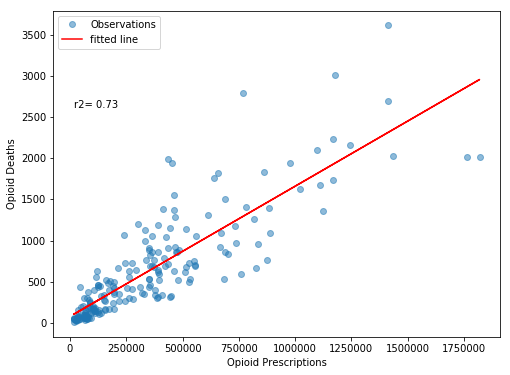

In [22]:
my_string = 'r2= {}'.format(np.round(r_value**2,2))
plt.figure(figsize=(8,6))
plt.plot(x, y, 'o', alpha =0.5, label='Observations')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.xlabel('Opioid Prescriptions')
plt.ylabel('Opioid Deaths')
plt.legend(loc='upper left')
plt.text(min(x)-100,max(y)-1000,my_string)

In [13]:
state_array = df1['state'].unique()
state_array

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [14]:
r2_array = []

for state_abv in state_array :
    x = df1[ df1['state']==state_abv ]['Number of Prescriptions']
    y = df1[ df1['state']==state_abv ]['opdDeath']
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
    r2_array.append(np.round(r_value**2,2))

In [15]:
r2_array

[0.73,
 0.72,
 0.97,
 0.21,
 0.69,
 0.81,
 0.02,
 0.17,
 0.72,
 0.5,
 0.9,
 0.3,
 0.9,
 0.79,
 0.97,
 0.51,
 0.28,
 0.8,
 0.93,
 0.91,
 0.23,
 0.69,
 0.72,
 0.24,
 0.73,
 0.53,
 0.58,
 0.42,
 0.22,
 0.1,
 0.72,
 0.05,
 0.13,
 0.2,
 0.52,
 0.8,
 0.33,
 0.49,
 0.72,
 0.5,
 0.8,
 0.16,
 0.4,
 0.74,
 0.0,
 0.93,
 0.93,
 0.85,
 0.32,
 0.06,
 0.82]

In [16]:
df_r2 = pd.DataFrame({'state':state_array, 'r2':r2_array})

In [17]:
df_r2.head()

,state,r2
0,AL,0.73
1,AK,0.72
2,AZ,0.97
3,AR,0.21
4,CA,0.69


In [18]:
df_r2 = df_r2.sort_values(by = 'r2', ascending = False)
df_r2.head()

,state,r2
2,AZ,0.97
14,IN,0.97
18,LA,0.93
46,VA,0.93
45,VT,0.93


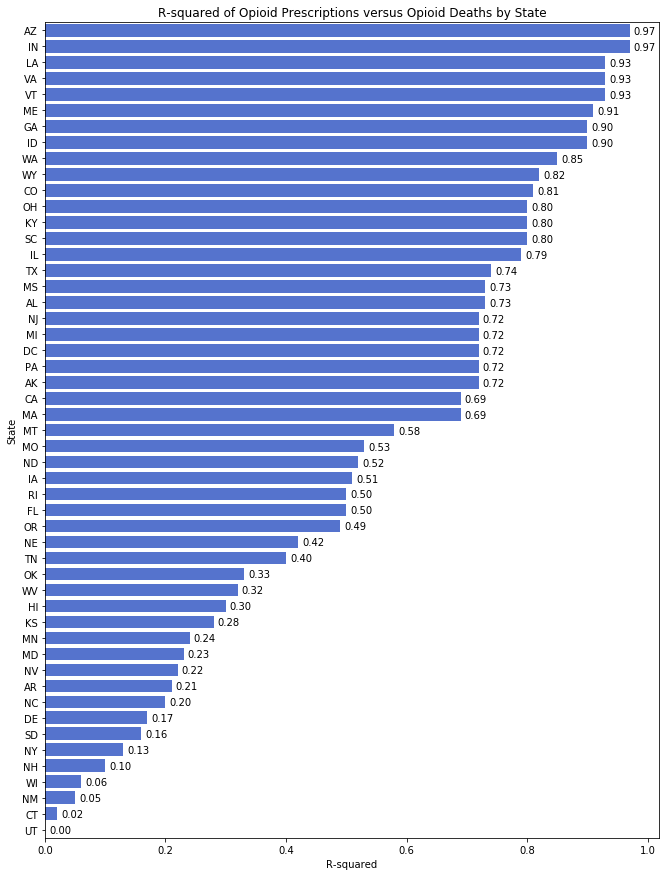

In [24]:
x = df_r2['r2']
y = df_r2['state']

fig, ax = plt.subplots(figsize=(11,15))
plt.title('R-squared of Opioid Prescriptions versus Opioid Deaths by State')
sns.barplot(x,y,color = 'royalblue', ax=ax)
plt.xlabel('R-squared')
plt.ylabel('State')
for p in ax.patches:
    width = p.get_width()
    plt.text(.025+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')